# Imports

In [11]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# function to load and process the data 

In [2]:
# Function to load images from a specified folder
# Each subfolder in 'folder' corresponds to a different class
def load_images_from_folder(folder):
    images = []  # To store the image data
    labels = []  # To store corresponding class labels (numeric)
    class_names = sorted(os.listdir(folder))  # Sorted list of class names
    for idx, class_name in enumerate(class_names):
        class_path = os.path.join(folder, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)  # Read the image using OpenCV
            if img is not None:
                img = cv2.resize(img, (32, 32))  # Resize image to 32x32 pixels
                images.append(img)  # Append the image to the images list
                labels.append(idx)  # Append the numeric label for the class
    return np.array(images), np.array(labels), class_names

# Function to preprocess images using PCA (Principal Component Analysis)
# Reduces dimensionality to the specified number of components
def preprocess_data_with_pca(images_train, images_test, n_components=100):
    # Flatten the images to 1D vectors for each image
    images_train_flat = images_train.reshape((images_train.shape[0], -1))
    images_test_flat = images_test.reshape((images_test.shape[0], -1))

    # Standardize the data (mean=0, variance=1) before applying PCA
    scaler = StandardScaler()
    images_train_flat = scaler.fit_transform(images_train_flat)  # Fit and transform the training data
    images_test_flat = scaler.transform(images_test_flat)  # Transform the test data using the same scaler

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=n_components)
    images_train_pca = pca.fit_transform(images_train_flat)  # Fit and transform the training data
    images_test_pca = pca.transform(images_test_flat)  # Transform the test data using the same PCA

    return images_train_pca, images_test_pca

# function to train and evaluate the model

In [3]:
# Function to train an SVM model using Grid Search to find the best hyperparameters
def train_svm_with_grid_search(images_train, labels_train):
    # Define the hyperparameter grid for Grid Search
    param_grid = {
        'C': [0.1, 1, 10],  # Regularization parameter
        'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
        'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly' kernels
    }
    # Initialize GridSearchCV with SVM model and the defined parameter grid
    grid_search = GridSearchCV(svm.SVC(), param_grid, verbose=3, cv=3)  # 3-fold cross-validation
    grid_search.fit(images_train, labels_train)  # Fit the model to the training data
    return grid_search.best_estimator_  # Return the model with the best found parameters

# Function to evaluate the trained model on the test data
def evaluate_model(model, images_test, labels_test, class_names):
    y_pred = model.predict(images_test)  # Predict the labels for test data
    accuracy = accuracy_score(labels_test, y_pred)  # Calculate the accuracy of the model
    report = classification_report(labels_test, y_pred, target_names=class_names)  # Generate classification report
    print(f"Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy as a percentage
    print("Classification Report:\n", report)  # Print the detailed classification report

# load and run the code

In [4]:
# Load data
images_train, labels_train, class_names = load_images_from_folder('C:\\Users\\dovy4\\Desktop\\1000')
images_test, labels_test, _ = load_images_from_folder('C:\\Users\\dovy4\\Desktop\\test_100')

In [5]:
# Preprocess the data using PCA to reduce dimensionality to 100 components
images_train_flat, images_test_flat = preprocess_data_with_pca(images_train, images_test, n_components=100)

In [6]:
# Train the model with Grid Search
svm_model = train_svm_with_grid_search(images_train_flat, labels_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.371 total time=  57.5s
[CV 2/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.390 total time=  55.9s
[CV 3/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.373 total time=  52.5s
[CV 1/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.379 total time=   5.3s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.372 total time=   5.4s
[CV 3/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.366 total time=   5.3s
[CV 1/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.312 total time=   3.4s
[CV 2/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.301 total time=   3.5s
[CV 3/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.287 total time=   3.4s
[CV 1/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.371 total time=  56.3s
[CV 2/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.390 total time=  56.4s
[CV 3/3] END ..C=0.1, gamma=auto, kernel=linear;

In [7]:
# Evaluate the model
evaluate_model(svm_model, images_test_flat, labels_test, class_names)

Accuracy: 44.60%
Classification Report:
               precision    recall  f1-score   support

    airplane       0.52      0.49      0.50       100
  automobile       0.53      0.51      0.52       100
        bird       0.37      0.39      0.38       100
         cat       0.27      0.32      0.29       100
        deer       0.32      0.35      0.33       100
         dog       0.34      0.27      0.30       100
        frog       0.48      0.48      0.48       100
       horse       0.62      0.50      0.55       100
        ship       0.59      0.61      0.60       100
       truck       0.49      0.54      0.51       100

    accuracy                           0.45      1000
   macro avg       0.45      0.45      0.45      1000
weighted avg       0.45      0.45      0.45      1000



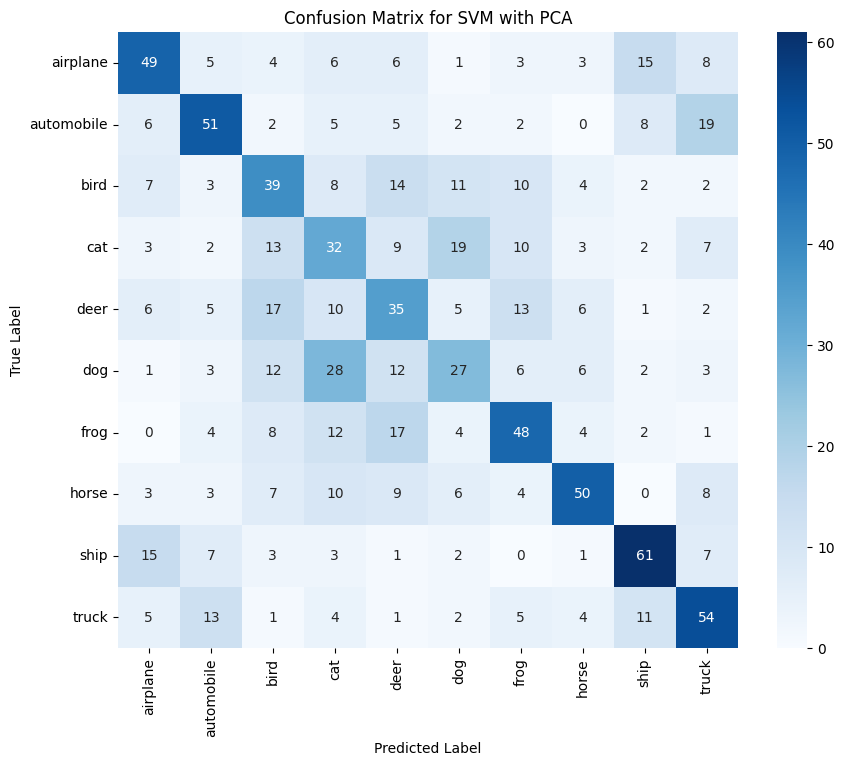

In [12]:
# Confusion Matrix
y_pred = svm_model.predict(images_test_flat)
conf_matrix = confusion_matrix(labels_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM with PCA')
plt.show()